<a href="https://colab.research.google.com/github/brunoegs/DiploDatos2021/blob/main/exploracion-y-curacion/entregables/entregable-parte-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [32]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [33]:
# Acá deberían leer el conjunto de datos que ya tienen.
#'https://github.com/Nicoch590/Curacion/blob/main/DataFrame_curado.csv'
melb_df_or = pandas.read_csv('https://raw.githubusercontent.com/Nicoch590/Curacion/main/DataFrame_curado.csv')
melb_df_or[:3]

melb_df=melb_df_or.copy()

melb_df.Suburb.nunique()

232

In [34]:
melb_df_or.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'date', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'],
      dtype='object')

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [35]:
# Reduccion de Suburbios: realizamos una reduccion mayor de los suburbios por cuestiones de RAM
Suburb_count = melb_df.Suburb.value_counts().reset_index().rename(columns={'index':'suburb','Suburb':'count'})
Suburb_reduccion = list(Suburb_count[Suburb_count['count']>100].suburb)

In [36]:
# Suburbios con menos de 100 registros se clasifican como 'Other_suburbs'
melb_df['Suburb_red']=numpy.where(melb_df.Suburb.isin(Suburb_reduccion),melb_df.Suburb,'Other_Suburbs')

In [37]:
# Tomamos de la variable date solo el mes en que se realizo la venta
melb_df['month'] = pandas.DatetimeIndex(melb_df['date']).month

In [38]:
# Seleccion de columnas relevantes, categoricas y numericas
cols_1 =['Suburb', 'Rooms', 'Type', 'Price', 'date', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean']

categorical_cols = ['Suburb_red','Type','month'] 
numerical_cols = ['Rooms','Bathroom','Car', 'Distance', 'Price','Lattitude',  
       'Longtitude','airbnb_price_mean','airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'] 

In [39]:
# cantidad de categorias por variable categoricas
melb_df[categorical_cols].nunique()

Suburb_red    43
Type           3
month         12
dtype: int64

In [40]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Suburb_red    0
Type          0
month         0
dtype: int64

In [41]:
# Importamos y entrenamos OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [42]:
# Transformamos las columnas Categoricas
encoded_categorical = encoder.transform(melb_df[categorical_cols])

# Almacenamos los nombres de las variables categoricas
new_columns = [] # lista con nombres de columnas
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(encoded_categorical.shape, new_columns))

# Agregar las variables numericas al encoding anterior
melb_encoded = numpy.hstack((encoded_categorical,melb_df[numerical_cols]))
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(melb_encoded.shape, new_columns))


Matrix has shape (13298, 58), with columns: ['Suburb_red=Ascot Vale', 'Suburb_red=Balwyn North', 'Suburb_red=Bentleigh', 'Suburb_red=Bentleigh East', 'Suburb_red=Brighton', 'Suburb_red=Brighton East', 'Suburb_red=Brunswick', 'Suburb_red=Brunswick West', 'Suburb_red=Camberwell', 'Suburb_red=Carnegie', 'Suburb_red=Coburg', 'Suburb_red=Doncaster', 'Suburb_red=Elwood', 'Suburb_red=Essendon', 'Suburb_red=Fawkner', 'Suburb_red=Footscray', 'Suburb_red=Glen Iris', 'Suburb_red=Glenroy', 'Suburb_red=Hampton', 'Suburb_red=Hawthorn', 'Suburb_red=Hawthorn East', 'Suburb_red=Keilor East', 'Suburb_red=Kensington', 'Suburb_red=Kew', 'Suburb_red=Malvern East', 'Suburb_red=Moonee Ponds', 'Suburb_red=Newport', 'Suburb_red=Northcote', 'Suburb_red=Other_Suburbs', 'Suburb_red=Pascoe Vale', 'Suburb_red=Port Melbourne', 'Suburb_red=Prahran', 'Suburb_red=Preston', 'Suburb_red=Reservoir', 'Suburb_red=Richmond', 'Suburb_red=South Yarra', 'Suburb_red=St Kilda', 'Suburb_red=Sunshine', 'Suburb_red=Surrey Hills', 'S

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [43]:
# Agregamos las columnas yearbuilt,buildingarea 
melb_enc_ag = numpy.hstack((melb_encoded,melb_df[['YearBuilt','BuildingArea']]))
# Agregamos las columnas al Registro de nombres para reconstruir DataFrame
new_columns.extend(['YearBuilt','BuildingArea'])
melb_enc_ag.shape

(13298, 70)

In [44]:
# Almacenamos la ubicacion da las columnas YearBuilt,BuildingArea
Yb= new_columns.index('YearBuilt')
Ba= new_columns.index('BuildingArea')
melb_enc_ag[:,[Yb,Ba]]


array([[  nan,   nan],
       [1900.,   79.],
       [1900.,  150.],
       ...,
       [1997.,   nan],
       [1920.,  157.],
       [1920.,  112.]])

In [45]:
melb_enc_ag_escal=melb_enc_ag.copy()

El imputador KNN regresor necesita que los datos esten escalados, utilizamos MinMaxScaler para escalar la matriz 

In [46]:
#Escalado con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(melb_enc_ag_escal)

melb_enc_ag_escal=scaler.transform(melb_enc_ag_escal)
melb_enc_ag_escal.shape


(13298, 70)

Realizamos la imputacion de las columnas con dos metodos: el primero utilizando solo las columnas BuildingArea, YearBuilt , y el segundo metodo utilizando todas las variables seleccionadas.

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)
melb_enc_ag_imp = melb_enc_ag_escal.copy()

# Imputacion utilizando solo las columnas YearBuilt y BuildingArea
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

# Imputacion utilizando todas las columnas seleccionadas
mice_imputer_enc = IterativeImputer(random_state=0,estimator=KNeighborsRegressor())
melb_enc_ag_imp = mice_imputer_enc.fit_transform(melb_enc_ag_imp)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Luego de Realizar la imputacion re-escalamos los datos a sus dimensiones originales para graficar y comparar los metodos de imputacion.

In [48]:
# Re escalado de datos a dimensiones originales
melb_all_imp = scaler.inverse_transform(melb_enc_ag_imp)
melb_all_imp.shape

(13298, 70)

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [49]:
# Construimos DataFrames con las columnas imputadas Yearbuilt,BuildingArea 
melb_all_built= pandas.DataFrame(melb_all_imp[:,Yb],columns=['YearBuilt'])
melb_all_built['Imputation']='KNN all Var'
melb_all_Area=pandas.DataFrame(melb_all_imp[:,Ba],columns=['BuildingArea'])
melb_all_Area['Imputation']='KNN all Var'

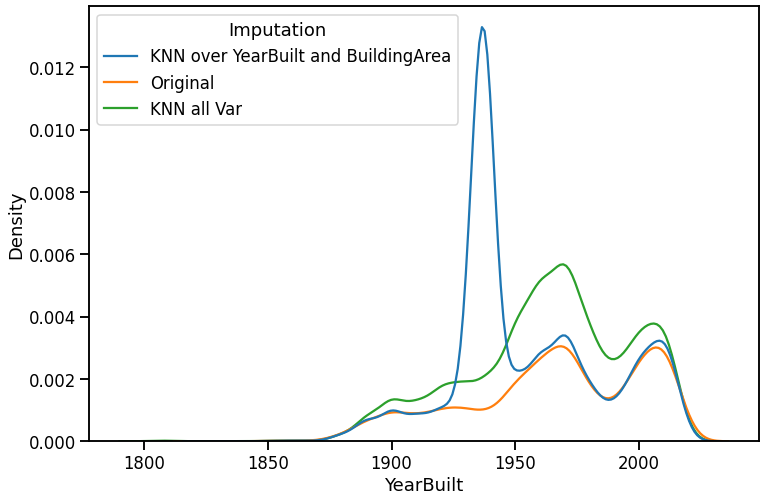

In [50]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data_year = pandas.concat([mice_year_built, melb_year_build,melb_all_built])
fig = plt.figure(figsize=(12, 8))
g = seaborn.kdeplot(data=data_year[data_year.YearBuilt>1800], x='YearBuilt', hue='Imputation')

En el grafico podemos observar, que el metodo que utiliza todas las columnas seleccionadas ("KNN All Var") se aproxima mas a la distribucion de la variable YearBuilt original que el Metodo que solo utiliza las variables imputadas.

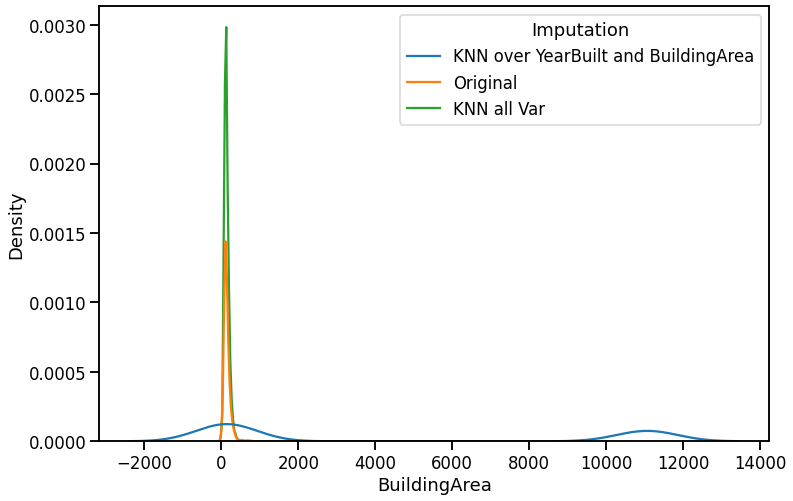

In [51]:
mice_year_Area = melb_data_mice.BuildingArea.to_frame()
mice_year_Area['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_Area = melb_df.BuildingArea.dropna().to_frame()
melb_year_Area['Imputation'] = 'Original'
data_Area = pandas.concat([mice_year_Area, melb_year_Area,melb_all_Area])
fig = plt.figure(figsize=(12, 8))
g = seaborn.kdeplot(data=data_Area[data_Area.BuildingArea<20000], x='BuildingArea', hue='Imputation')

En el grafico podemos observar, que el metodo que utiliza todas las columnas seleccionadas ("KNN All Var") se aproxima mas a la distribucion de la variable BuildingArea original que el Metodo que solo utiliza las variables imputadas. 

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [52]:
n= min(20,melb_enc_ag_imp.shape[1])

Para realizar PCA es necesario que los datos esten escalados, ya que si no los estuvieran, las variables con mayores valores absolutos representarian la mayor varianza e influirian en el calculo de las componentes principales. Tomamos la matriz utilizada en el ejercicio anterior para calcular componentes principales.

In [53]:
pca_melb_data= melb_enc_ag_imp.copy()

In [54]:
# Eliminamos la variable 'Price' para realizar la proyeccion sobre componentes principales
pca_melb_data = numpy.delete(pca_melb_data,new_columns.index('Price'), axis=1)

In [55]:
pca_melb_data.shape,melb_enc_ag_imp.shape

((13298, 69), (13298, 70))

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n)
pca.fit(pca_melb_data)
proyected_features = pca.transform(pca_melb_data)
proyected_features.shape

(13298, 20)

In [57]:
pca.explained_variance_ratio_

array([0.16792026, 0.11150167, 0.06004118, 0.05644047, 0.05115258,
       0.04955595, 0.046731  , 0.04245324, 0.03825322, 0.03014748,
       0.02574572, 0.02393281, 0.02279857, 0.01677623, 0.01205703,
       0.01174492, 0.0093793 , 0.00911623, 0.0082877 , 0.00796508])

Grafico de la varianza representada por componentes

Text(0.5, 0, 'Components')

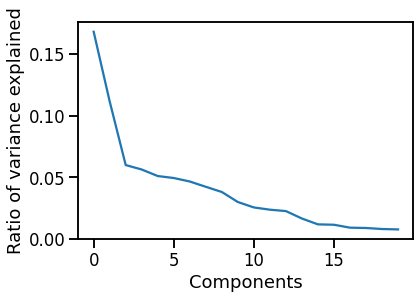

In [58]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")

Observando la varianza capturada, decidimos utilizar las primeras 5 componentes del PCA

In [59]:
# Agregamos las primeras cinco componentes de PCA a la matriz
melb_final = numpy.hstack([melb_all_imp,proyected_features[:,[0,1,2,3,4]]])
# Agregamos nombres para columnas PCA en registro de nombres
new_columns.extend(['pca1', 'pca2','pca3','pca4','pca5'])

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [60]:
melb_final.shape

(13298, 75)

In [61]:
## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=melb_final, columns=new_columns)
processed_melb_df.head()

,Suburb_red=Ascot Vale,Suburb_red=Balwyn North,Suburb_red=Bentleigh,Suburb_red=Bentleigh East,Suburb_red=Brighton,Suburb_red=Brighton East,Suburb_red=Brunswick,Suburb_red=Brunswick West,Suburb_red=Camberwell,Suburb_red=Carnegie,Suburb_red=Coburg,Suburb_red=Doncaster,Suburb_red=Elwood,Suburb_red=Essendon,Suburb_red=Fawkner,Suburb_red=Footscray,Suburb_red=Glen Iris,Suburb_red=Glenroy,Suburb_red=Hampton,Suburb_red=Hawthorn,Suburb_red=Hawthorn East,Suburb_red=Keilor East,Suburb_red=Kensington,Suburb_red=Kew,Suburb_red=Malvern East,Suburb_red=Moonee Ponds,Suburb_red=Newport,Suburb_red=Northcote,Suburb_red=Other_Suburbs,Suburb_red=Pascoe Vale,Suburb_red=Port Melbourne,Suburb_red=Prahran,Suburb_red=Preston,Suburb_red=Reservoir,Suburb_red=Richmond,Suburb_red=South Yarra,Suburb_red=St Kilda,Suburb_red=Sunshine,Suburb_red=Surrey Hills,Suburb_red=Thornbury,Suburb_red=West Footscray,Suburb_red=Williamstown,Suburb_red=Yarraville,Type=h,Type=t,Type=u,month=1,month=2,month=3,month=4,month=5,month=6,month=7,month=8,month=9,month=10,month=11,month=12,Rooms,Bathroom,Car,Distance,Price,Lattitude,Longtitude,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,YearBuilt,BuildingArea,pca1,pca2,pca3,pca4,pca5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.5,1480000.0,-37.7996,144.9984,130.624031,605.152174,2187.032258,1923.2,99.8,-0.449294,0.373074,0.010900,0.189900,-0.296722
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.5,1035000.0,-37.8079,144.9934,130.624031,605.152174,2187.032258,1900.0,79.0,-0.397459,0.331148,0.010663,0.123312,-0.191268
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,2.5,1465000.0,-37.8093,144.9944,130.624031,605.152174,2187.032258,1900.0,150.0,-0.433375,0.327007,0.010072,0.129148,-0.185699
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,2.5,850000.0,-37.7969,144.9969,130.624031,605.152174,2187.032258,1918.8,126.8,-0.451264,0.325647,0.008346,0.129109,-0.184712
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.5,1600000.0,-37.8072,144.9941,130.624031,605.152174,2187.032258,2014.0,142.0,-0.480886,0.323395,0.005185,0.128264,-0.184305


In [62]:
# Almacenamos el dataset procesado en un archivo CSV
processed_melb_df.to_csv(r'DataFrame_procesado.csv', index = False)

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900
  
  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


```
## Criterios de exclusión de ejemplos
  1. Se eliminan registros donde las variables 'price', 'car', 'bathroom', 'rooms'  superen en 2.5 veces el tercer cuartil, ya que estos valores son considerados valores extremos, y dichos ejemplos no son considerados relevantes para la población que se quiere evaluar.

## Características seleccionadas
  
### Características categóricas:
  1. Suburb: zona residencial en las afueras de una ciudad de Melbourne.
  2. Type: Tipo de propiedad, puede tomar los siguientes valores: 
    * h - house,cottage,villa, semi,terrace.
    * u - unit, duplex.
    * t - townhouse; dev site - development site; o res - other residential.
  3. date: Fecha en la que fué vendida.

Todas las características categóricas fueron codificadas con un método OneHotEncoding.

### Características numéricas:
  1. Price: Precio de la vivienda en dolares.
  2. Rooms: Cantidad de habitaciones.
  3. Distance: Distancia al centro de la ciudad.
  4. Postcode: Codigo postal del dataset original (se utilizó para unir el dataset externo).
  5. Bathroom: Numero de baños.
  6. Car: Numero de cocheras.
  7. Lattitude: Latitud.
  8. Longtitude: Longitud.
  9. zipcode: Codigo postal del dataset externo (se utilizó para unir al dataset original)
  10. airbnb_price_mean: Se agrega el precio promedio diario de publicaciones de la plataforma AirBnB en el mismo código postal.
  11. airbnb_record_count: Cantidad de regitros que existen sobre la variable 'price' para cada codigo postal en dataset Airbnb.
  12. airbnb_weekly_price_mean: Se agrega el precio promedio semanal de publicaciones de la plataforma AirBnB en el mismo código postal.
  13. airbnb_monthly_price_mean:  Se agrega el precio promedio mensual de publicaciones de la plataforma AirBnB en el mismo código postal.

## Transformaciones
  1. Las variables 'airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean' fueron imputadas utilizando el Simple Imputer utilizando como estrategia imputación por la media 
  2. Las columnas `YearBuilt` y 'BuildingArea fueron agregadas posteriormente a la matriz de datos obtenida, luego de realizar el encoding e imputadas utilizando el IterativeImputer con un estimador KNeighborsRegressor utilizando todo el conjunto de variables seleccionadas, siendo previamente escaladas con el metodo MinMaxScaler.

## Datos aumentados
  1. Se agregan las primeras 5 columnas correspondientes a las 5 primeras componentes principales, obtenidas a través del método de PCA, aplicado sobre el conjunto de datos totalmente procesado.
```
